In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russia=pd.read_csv('Russia.csv')

In [3]:
russia

,Observation Date,Country,Confirmed,Death,Recovered
0,01/31/2020,Russia,2,0,0
1,02-01-2020,Russia,2,0,0
2,02-02-2020,Russia,2,0,0
3,02-03-2020,Russia,2,0,0
4,02-04-2020,Russia,2,0,0
...,...,...,...,...,...
30246,05/29/2021,Russia,46023,1092,42907
30247,05/29/2021,Russia,84672,2910,80119
30248,05/29/2021,Russia,39063,419,37848
30249,05/29/2021,Russia,40903,605,38968


In [4]:
russia.describe()

,Confirmed,Death,Recovered
count,3.025100e+04,30251.000000,3.025100e+04
mean,3.076093e+04,607.045023,2.613817e+04
std,8.378532e+04,1589.604564,7.265993e+04
min,2.000000e+00,0.000000,0.000000e+00
25%,6.365000e+03,60.000000,4.786500e+03
50%,1.535700e+04,187.000000,1.270500e+04
75%,3.177550e+04,527.000000,2.827250e+04
max,1.173637e+06,20001.000000,1.058041e+06


In [5]:
# Assuming 'china' is your DataFrame
russia['Observation Date'] = pd.to_datetime(russia['Observation Date'], errors='coerce', infer_datetime_format=True)

# Create a new column 'Month' with the month extracted from 'Observation Date'
russia['Month'] = russia['Observation Date'].dt.month

# Now, 'Observation Date' is kept in the dataframe, and 'Month' is added
print(russia)

      Observation Date Country  Confirmed  Death  Recovered  Month
0           2020-01-31  Russia          2      0          0    1.0
1                  NaT  Russia          2      0          0    NaN
2                  NaT  Russia          2      0          0    NaN
3                  NaT  Russia          2      0          0    NaN
4                  NaT  Russia          2      0          0    NaN
...                ...     ...        ...    ...        ...    ...
30246       2021-05-29  Russia      46023   1092      42907    5.0
30247       2021-05-29  Russia      84672   2910      80119    5.0
30248       2021-05-29  Russia      39063    419      37848    5.0
30249       2021-05-29  Russia      40903    605      38968    5.0
30250       2021-05-29  Russia      43126    669      41650    5.0

[30251 rows x 6 columns]


C:\Users\aryan\AppData\Local\Temp\ipykernel_17236\1775167431.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  russia['Observation Date'] = pd.to_datetime(russia['Observation Date'], errors='coerce', infer_datetime_format=True)


In [6]:
# Store the modified data in a new DataFrame named 'India_new'
russia_new = russia.copy()

# Display the resulting DataFrame
print(russia_new)

      Observation Date Country  Confirmed  Death  Recovered  Month
0           2020-01-31  Russia          2      0          0    1.0
1                  NaT  Russia          2      0          0    NaN
2                  NaT  Russia          2      0          0    NaN
3                  NaT  Russia          2      0          0    NaN
4                  NaT  Russia          2      0          0    NaN
...                ...     ...        ...    ...        ...    ...
30246       2021-05-29  Russia      46023   1092      42907    5.0
30247       2021-05-29  Russia      84672   2910      80119    5.0
30248       2021-05-29  Russia      39063    419      37848    5.0
30249       2021-05-29  Russia      40903    605      38968    5.0
30250       2021-05-29  Russia      43126    669      41650    5.0

[30251 rows x 6 columns]


In [7]:
russia=russia.drop(columns=['Month'])

In [16]:
# Create a mapping of month numbers to seasons
season_mapping = {
    3: 'Winter',
    4: 'Winter',
    5: 'Summer',
    6: 'Summer',
    7: 'Summer',
    8: 'Monsoon',
    9: 'Monsoon',
    10: 'Monsoon',
    11: 'Winter',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter'
}

# Map the month numbers to seasons and create a new 'Seasons' column
russia_new['Seasons'] = russia_new['Month'].map(season_mapping)

# Display the DataFrame with the new 'Seasons' column
print(russia_new)

      Observation Date Country  Confirmed  Death  Recovered  Month Seasons  \
0           2020-01-31  Russia          2      0          0    1.0  Winter   
1                  NaT  Russia          2      0          0    NaN     NaN   
2                  NaT  Russia          2      0          0    NaN     NaN   
3                  NaT  Russia          2      0          0    NaN     NaN   
4                  NaT  Russia          2      0          0    NaN     NaN   
...                ...     ...        ...    ...        ...    ...     ...   
30246       2021-05-29  Russia      46023   1092      42907    5.0  Summer   
30247       2021-05-29  Russia      84672   2910      80119    5.0  Summer   
30248       2021-05-29  Russia      39063    419      37848    5.0  Summer   
30249       2021-05-29  Russia      40903    605      38968    5.0  Summer   
30250       2021-05-29  Russia      43126    669      41650    5.0  Summer   

       Active  
0           2  
1           2  
2           2  

In [17]:
russia_new.head()

,Observation Date,Country,Confirmed,Death,Recovered,Month,Seasons,Active
0,2020-01-31,Russia,2,0,0,1.0,Winter,2
1,NaT,Russia,2,0,0,NaN,NaN,2
2,NaT,Russia,2,0,0,NaN,NaN,2
3,NaT,Russia,2,0,0,NaN,NaN,2
4,NaT,Russia,2,0,0,NaN,NaN,2


In [18]:
# Convert 'Observation Date' column to datetime format
russia_new['Observation Date'] = pd.to_datetime(russia_new['Observation Date'])

# Calculate active cases and add a new column 'Active'
russia_new['Active'] = russia_new['Confirmed'] - russia_new['Death'] - russia_new['Recovered']

# Now, 'Active' column is added with the active cases information
print(russia_new)

      Observation Date Country  Confirmed  Death  Recovered  Month Seasons  \
0           2020-01-31  Russia          2      0          0    1.0  Winter   
1                  NaT  Russia          2      0          0    NaN     NaN   
2                  NaT  Russia          2      0          0    NaN     NaN   
3                  NaT  Russia          2      0          0    NaN     NaN   
4                  NaT  Russia          2      0          0    NaN     NaN   
...                ...     ...        ...    ...        ...    ...     ...   
30246       2021-05-29  Russia      46023   1092      42907    5.0  Summer   
30247       2021-05-29  Russia      84672   2910      80119    5.0  Summer   
30248       2021-05-29  Russia      39063    419      37848    5.0  Summer   
30249       2021-05-29  Russia      40903    605      38968    5.0  Summer   
30250       2021-05-29  Russia      43126    669      41650    5.0  Summer   

       Active  
0           2  
1           2  
2           2  

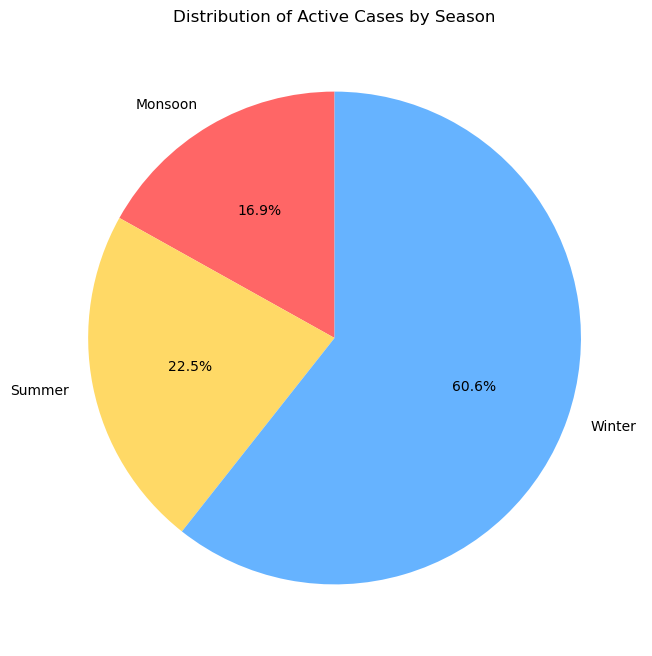

In [19]:
seasonal_active = russia_new.groupby('Seasons')['Active'].sum()

# Custom bright and dark color palette
colors = ['#ff6666', '#ffd966', '#66b3ff', '#99ff99']

# Create a pie chart with the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(seasonal_active, labels=seasonal_active.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Active Cases by Season')
plt.show()

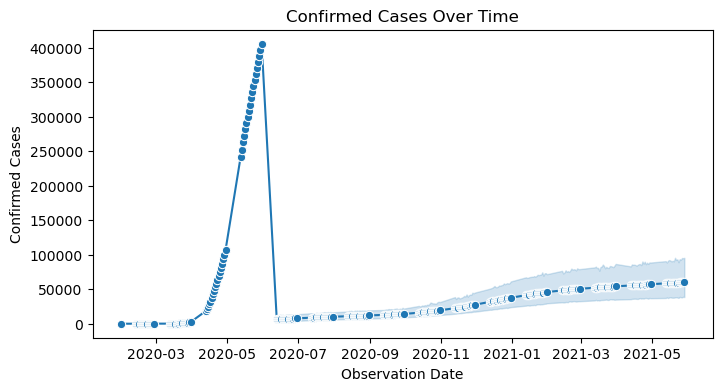

In [20]:
# Plot 1: Confirmed cases over time
plt.figure(figsize=(8,4))
sns.lineplot(x='Observation Date', y='Confirmed', data=russia_new, marker='o')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Confirmed Cases')
plt.show()

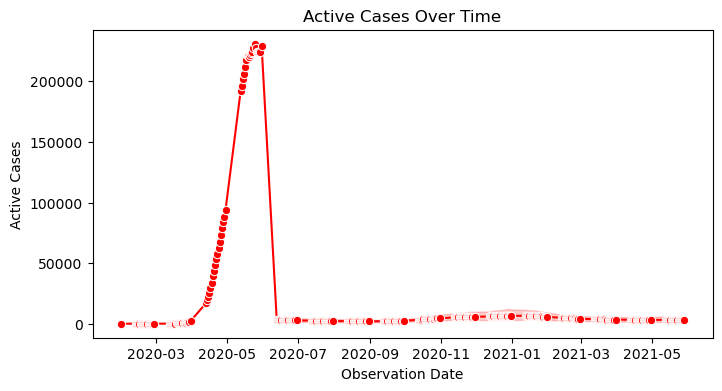

In [21]:
# Plot 2: Active cases over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='Observation Date', y='Active', data=russia_new, marker='o', color='red')
plt.title('Active Cases Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Active Cases')
plt.show()

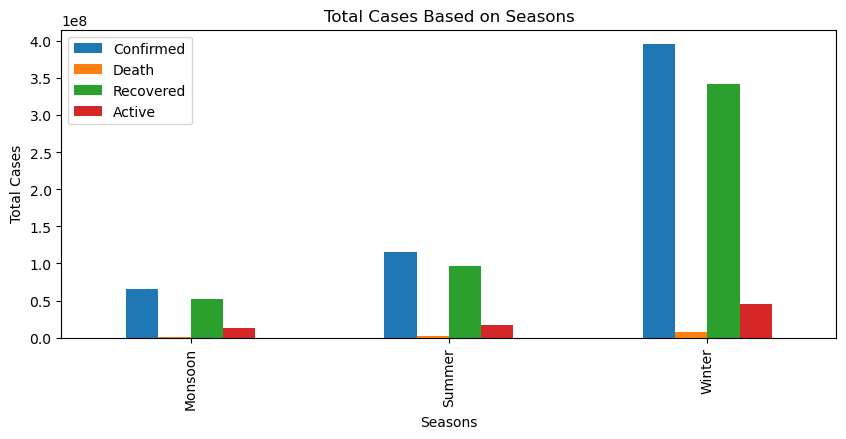

In [22]:
# Plot 1: Bar chart for Confirmed, Death, Recovered, and Active cases based on seasons
fig, ax = plt.subplots(figsize=(10, 4))
russia_new.groupby('Seasons')[['Confirmed', 'Death', 'Recovered', 'Active']].sum().plot(kind='bar', ax=ax)
plt.title('Total Cases Based on Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Cases')
plt.show()